In [26]:
import json
import pathlib

import numpy as np
import seaborn as sns


data_dir = pathlib.Path('../../data/real/real_preemption/2023-04-22/parsed').absolute()
# data_dir = pathlib.Path(
#     '../../data/real/availability/2023-02-15/parsed'
# ).absolute()


all_lifetimes = []
all_waittimes = []
for data_path in data_dir.glob('*.json'):
    with data_path.open('r') as f:
        trace = json.load(f)

        availability_trace = 1 - np.array(trace['data'])
        gap_seconds = trace['metadata']['gap_seconds']
        padded = np.array([0] + availability_trace.tolist() + [0])
        start_end = padded[1:] - padded[:-1]
        lengths = np.where(start_end == -1)[0] - np.where(start_end == 1)[0]
        lifetimes = lengths * gap_seconds / 3600
        all_lifetimes.extend(lifetimes.tolist())

        padded = np.array([0] + (1-availability_trace).tolist() + [0])
        start_end = padded[1:] - padded[:-1]
        lengths = np.where(start_end == -1)[0] - np.where(start_end == 1)[0]

        waittimes = lengths * gap_seconds / 3600
        all_waittimes.extend(waittimes.tolist())

lifetimes = np.array(all_lifetimes)
waittimes = np.array(all_waittimes)


In [31]:
print('Lifetime shorter than 10 mins:', sum(lifetimes[lifetimes <= 1/6]) / sum(lifetimes))
print('Waittime shorter than 10 mins:', sum(waittimes[waittimes <= 1/6]) / sum(waittimes))

print('Lifetime shorter than 10 mins:', sum(lifetimes <= 1/6) / len(lifetimes))
print('Waittime shorter than 10 mins:', sum(waittimes <= 1/6) / len(waittimes))


Lifetime shorter than 10 mins: 0.00918672845835213
Waittime shorter than 10 mins: 0.011627180096268052
Lifetime shorter than 10 mins: 0.23469387755102042
Waittime shorter than 10 mins: 0.26


<Axes: ylabel='Count'>

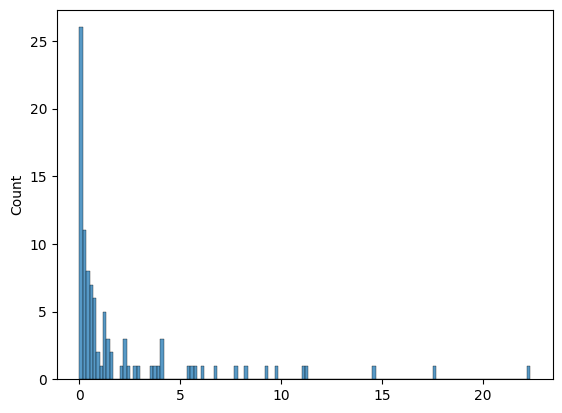

In [28]:
sns.histplot(lifetimes, binwidth=1/6, stat='count', label='lifetime')

<Axes: ylabel='Count'>

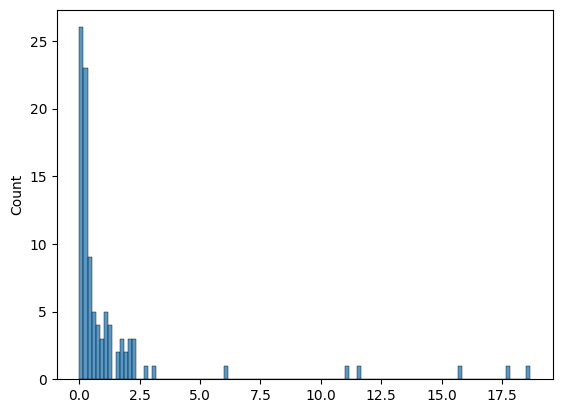

In [29]:
sns.histplot(waittimes, binwidth=1 / 6, stat='count', label='waittime')
